# Simpsons Character Recognition

This notebook is meant to be an example of VGG16 model fine tuned to recognize characters from the Simpsons. It is also a project created to support my progress on the fast.ai deep learning course.

In [1]:
import numpy as np
from keras.preprocessing import image
from numpy.random import random, permutation
import os
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data
from vgg16 import Vgg16
%matplotlib inline
from sklearn.metrics import confusion_matrix

Using Theano backend.


## Training model

The VGG16 model is loaded and fine tuned (transfer learning) to fit our dataset. 

In [2]:
path = "data/"
batch_size=8

In [3]:
vgg = Vgg16()
model = vgg.model

In [4]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
val_batches = get_batches(path+'valid', shuffle=False, batch_size=batch_size)
batches = get_batches(path+'train', shuffle=True, batch_size=batch_size)

Found 1320 images belonging to 2 classes.
Found 2380 images belonging to 2 classes.


In [ ]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=5)

Since the training was done on a CPU, it had be limited to a batch size of 8 samples and 5 epochs. It reaches an accuracy of 0.76 on the validation set.

## Viewing model prediction examples

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)


In [20]:
n_view = 4
path = "data/sample/"

In [18]:
val_batches = get_batches(path+'valid', shuffle=False, batch_size=200)
filenames = val_batches.filenames
imgs,labels = next(val_batches)
preds = vgg.predict(imgs)

Found 100 images belonging to 2 classes.


In [21]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], titles=titles)

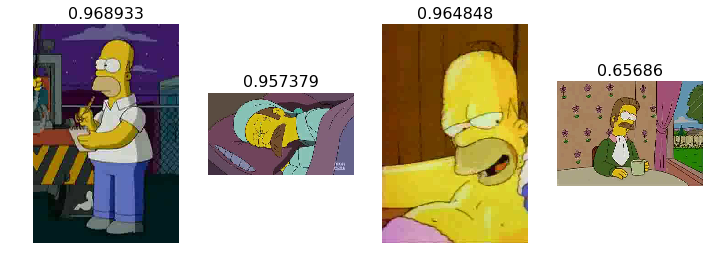

In [22]:
#1. A few correct labels at random
correct = np.where(preds[1]==labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, preds[0][idx])

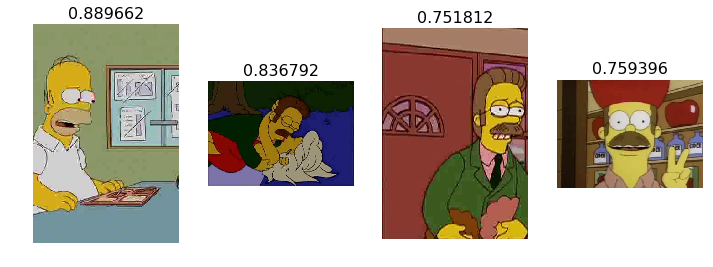

In [23]:
#2. A few incorrect labels at random
incorrect = np.where(preds[1]!=labels[:,1])[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, preds[0][idx])

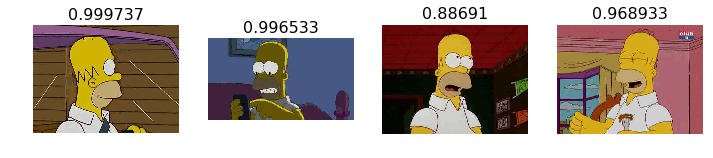

In [24]:
#3. The images we most confident were homers, and are actually homers
correct_homers = np.where((preds[1]==0) & (preds[1]==labels[:,1]))[0]
most_correct_homers = np.argsort(preds[0][correct_homers])[::-1][:n_view]
plots_idx(correct_homers[most_correct_homers], preds[0][most_correct_homers])

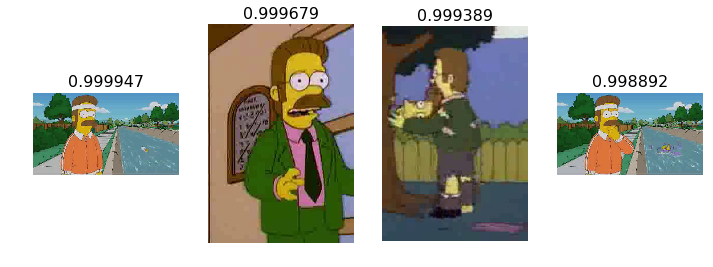

In [25]:
#4. The images we most confident were neds, and are actually neds
correct_neds = np.where((preds[1]==1) & (preds[1]==labels[:,1]))[0]
most_correct_neds = np.argsort(preds[0][correct_neds])[::-1][:n_view]
plots_idx(correct_neds[most_correct_neds], preds[0][correct_neds][most_correct_neds])

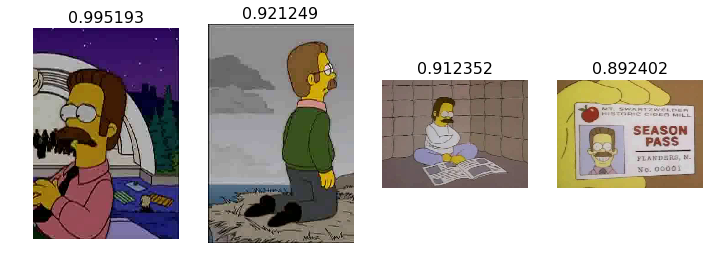

In [26]:
#5. The images we were most confident were homers, but are actually neds
incorrect_homers = np.where((preds[1]==0) & (preds[1]!=labels[:,1]))[0]
most_incorrect_homers = np.argsort(preds[0][incorrect_homers])[::-1][:n_view]
if len(most_incorrect_homers):
    plots_idx(incorrect_homers[most_incorrect_homers], preds[0][incorrect_homers][most_incorrect_homers])
else:
    print('No incorrect homers!')

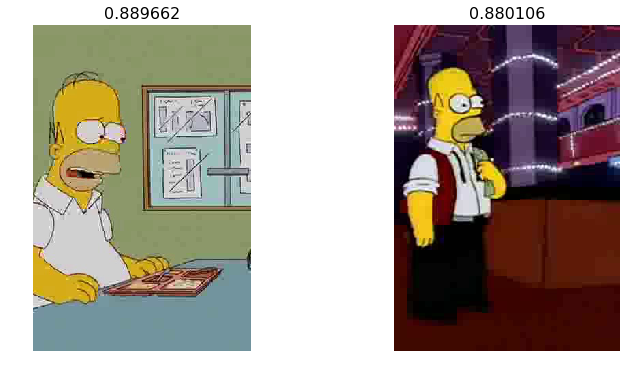

In [27]:
#3. The images we were most confident were neds, but are actually homers
incorrect_neds = np.where((preds[1]==1) & (preds[1]!=labels[:,1]))[0]
most_incorrect_neds = np.argsort(preds[0][incorrect_neds])[::-1][:n_view]
if len(most_incorrect_neds):
    plots_idx(incorrect_neds[most_incorrect_neds], preds[0][incorrect_neds][most_incorrect_neds])
else:
    print('No incorrect neds!')

[[48  2]
 [10 40]]


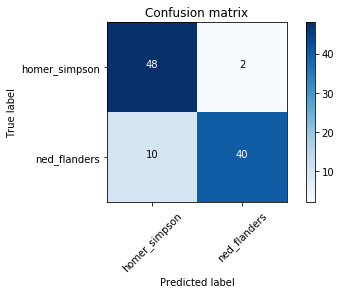

In [28]:
cm = confusion_matrix(val_batches.classes, preds[1])
plot_confusion_matrix(cm, sorted(val_batches.class_indices.keys()))